# Estudi de dades de OpenMP

A tindre a en compte
- Es necesari tindre les llibreries matplotlib i pandas per executar aquest document
- Els fitxers csv son del format, columna es tamany de matriu, i les files donen els temps
- Els comentaris fan referencia a les dades extretes amb el meu ordinador. Els temps d'execucio podrian variar molt si s'executes en un altre.

In [147]:
# Llibrerias necesaries
import pandas as pd
import matplotlib.pyplot as plt

## Suma de matrius

### Sequencial

Resultat

In [148]:
dfss = pd.read_csv('csv/sumaSequencial.csv')
dfss

,100x100,250x250,500x500,1000x1000,5000x5000,15000x15000,30000x30000,
0,0.000023,0.000135,0.000488,0.001711,0.082991,0.379312,1.301567,
1,0.000022,0.000117,0.000478,0.001845,0.127039,0.353017,1.265794,
2,0.000024,0.000120,0.000553,0.001743,0.175325,0.337217,1.296220,
3,0.000020,0.000115,0.000604,0.001750,0.142711,0.339798,1.276625,
4,0.000018,0.000119,0.000535,0.037512,0.191272,0.351990,1.343884,
5,0.000018,0.000117,0.001405,0.032143,0.156130,0.426345,1.322323,
6,0.000023,0.000139,0.000467,0.001596,0.088636,0.343970,1.310987,
7,0.000019,0.000119,0.000490,0.001535,0.164008,0.421661,1.277725,
8,0.000019,0.000122,0.000477,0.001657,0.220415,0.344554,1.275275,
9,0.000018,0.000135,0.000473,0.001562,0.172569,0.369294,1.307003,


A partir de ara no mostrare els csv pero si mostrare les seves grafiques.

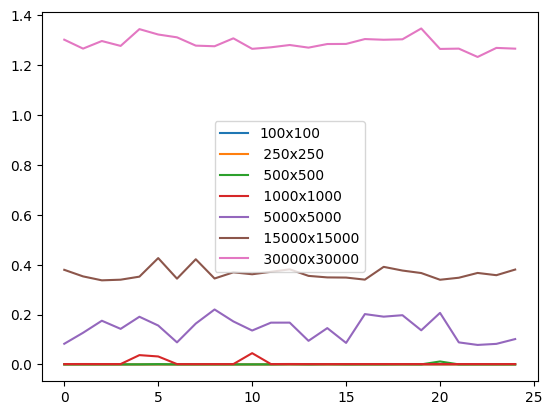

In [149]:
dfss.plot();

#### Mitjanes

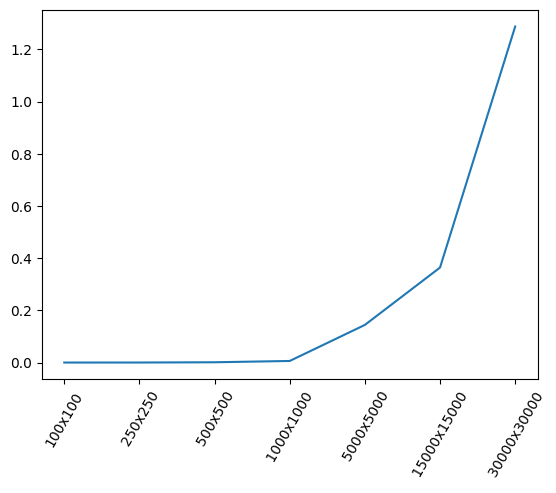

In [150]:
dfss.mean(numeric_only=True).plot()
plt.xticks(rotation=60)
plt.show()

Es pot veure com el temps de execucio augmenta rapidament.

### Paralelisme
Ara ho comparare amb una primera utilitzacio de paralelisme.

<Axes: >

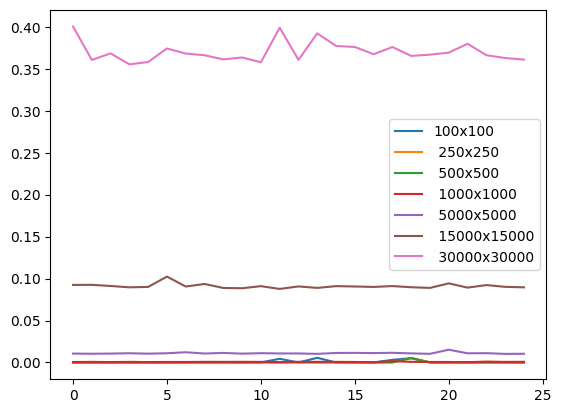

In [151]:
# Data frame suma paralel
dfsp = pd.read_csv('csv/sumaParalel.csv')
dfsp.plot()

Com es pot veure en las execucions de 10000x10000 el temps pot variar molt, aixo demostra el perque els calculs es fan a partir de la mitjana.

#### Comparant les mitjanes amb la suma sequencial

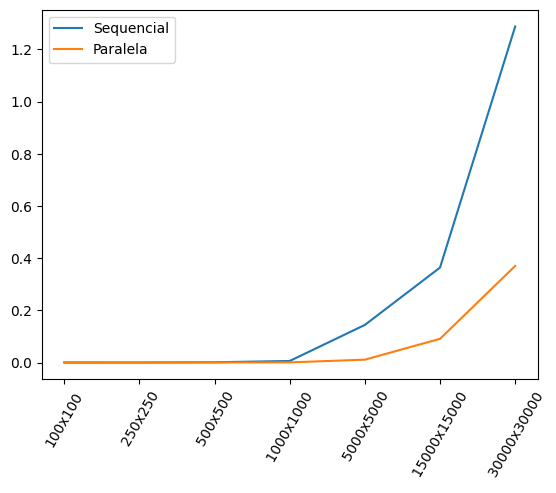

In [152]:
ax=dfss.mean(numeric_only=True).plot(label='Sequencial')
dfsp.mean(numeric_only=True).plot(ax=ax, label='Paralela')
plt.xticks(rotation=60)
plt.legend()
plt.show()

### Mixta

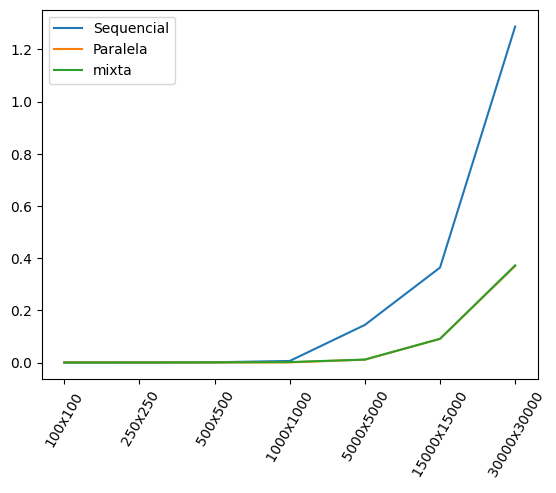

In [153]:
# Data frame suma mixta
dfsm = pd.read_csv('csv/sumaMixta.csv')
dfss.mean(numeric_only=True).plot(label='Sequencial')
dfsp.mean(numeric_only=True).plot(label='Paralela')
dfsm.mean(numeric_only=True).plot(label='mixta')
plt.xticks(rotation=60)
plt.legend()
plt.show()

### Producte Matrius

#### Producte sequencial

<Axes: >

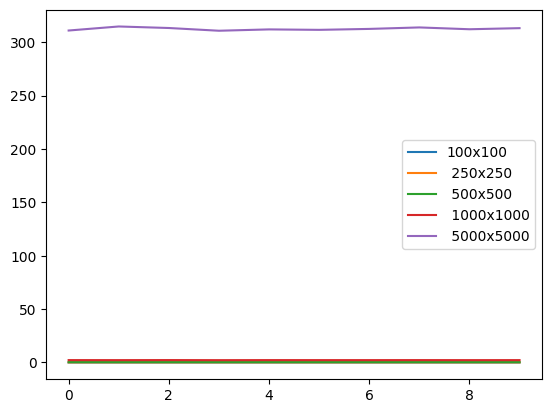

In [181]:
dfps = pd.read_csv('csv/producteSequencial.csv')
dfps.plot()

<Axes: >

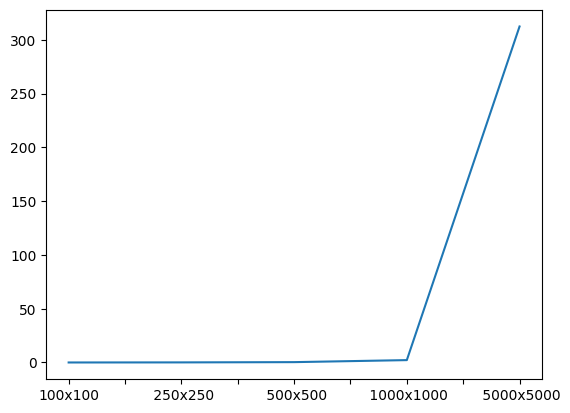

In [176]:
# Data frame producte
dfps.mean(numeric_only=True).plot(label='Sequencial')

#### Producte paralel per files

[]

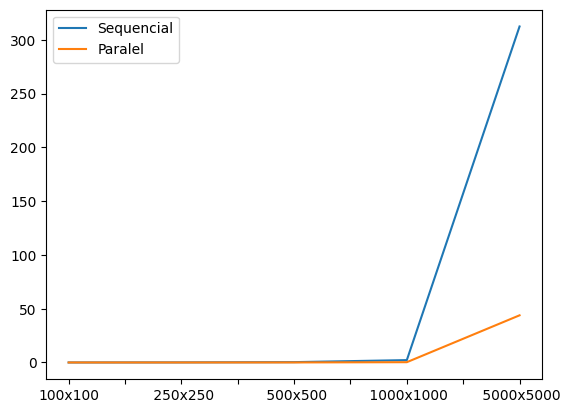

In [185]:
dfppf = pd.read_csv('csv/producteParelelitzacioFilas.csv')
dfps.mean(numeric_only=True).plot(label='Sequencial')
dfppf.mean(numeric_only=True).plot(label='Paralel')
plt.legend()
plt.plot()

#### Producte paralel per files i suma

[]

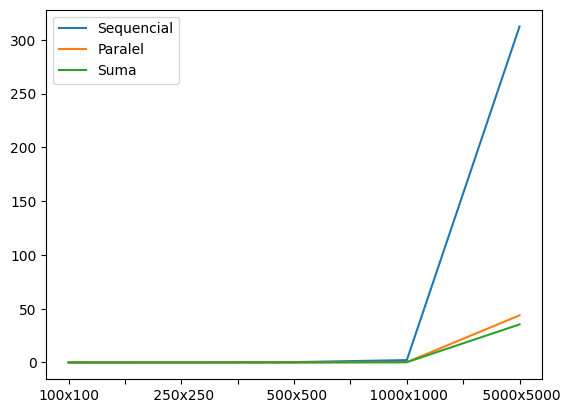

In [193]:
dfpps = pd.read_csv('csv/producteParelelitzacioSuma.csv')
dfps.mean(numeric_only=True).plot(label='Sequencial')
dfppf.mean(numeric_only=True).plot(label='Paralel')
dfpps.mean(numeric_only=True).plot(label='Suma')
plt.legend()
plt.plot()


[]

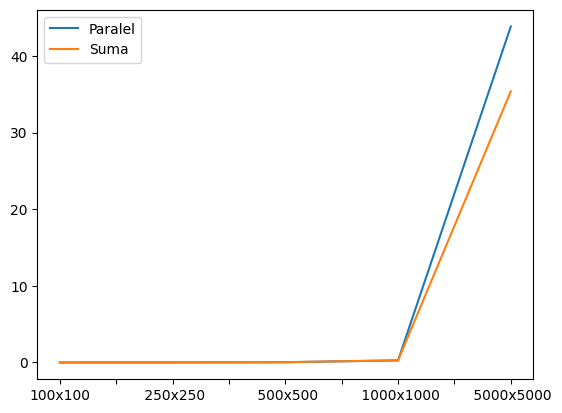

In [194]:
dfppf.mean(numeric_only=True).plot(label='Paralel')
dfpps.mean(numeric_only=True).plot(label='Suma')
plt.legend()
plt.plot()

### Producte paralel per fila amb scheduler

[]

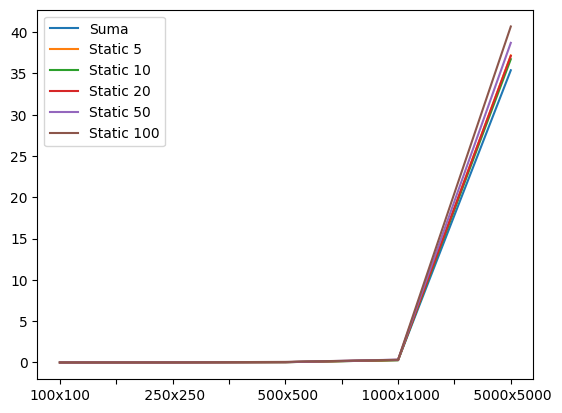

In [199]:
dfpps = pd.read_csv('csv/producteParelelitzacioSuma.csv')
dfps5 = pd.read_csv('csv/producteParelelitzacioStatic5.csv')
dfps10 = pd.read_csv('csv/producteParelelitzacioStatic10.csv')
dfps20 = pd.read_csv('csv/producteParelelitzacioStatic20.csv')
dfps50 = pd.read_csv('csv/producteParelelitzacioStatic50.csv')
dfps100 = pd.read_csv('csv/producteParelelitzacioStatic100.csv')
dfpps.mean(numeric_only=True).plot(label='Suma')
dfps5.mean(numeric_only=True).plot(label='Static 5')
dfps10.mean(numeric_only=True).plot(label='Static 10')
dfps20.mean(numeric_only=True).plot(label='Static 20')
dfps50.mean(numeric_only=True).plot(label='Static 50')
dfps100.mean(numeric_only=True).plot(label='Static 100')
plt.legend()
plt.plot()

#### Producte paralel sheduler. (Static vs Dinamic)

[]

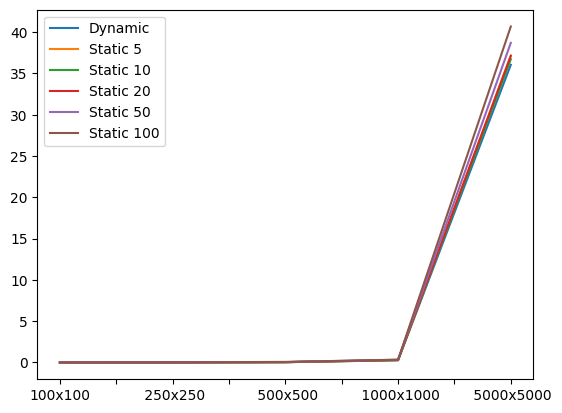

In [200]:
dfpsd = pd.read_csv('csv/producteParelelitzacioDynamic.csv')
dfps5 = pd.read_csv('csv/producteParelelitzacioStatic5.csv')
dfps10 = pd.read_csv('csv/producteParelelitzacioStatic10.csv')
dfps20 = pd.read_csv('csv/producteParelelitzacioStatic20.csv')
dfps50 = pd.read_csv('csv/producteParelelitzacioStatic50.csv')
dfps100 = pd.read_csv('csv/producteParelelitzacioStatic100.csv')
dfpsd.mean(numeric_only=True).plot(label='Dynamic')
dfps5.mean(numeric_only=True).plot(label='Static 5')
dfps10.mean(numeric_only=True).plot(label='Static 10')
dfps20.mean(numeric_only=True).plot(label='Static 20')
dfps50.mean(numeric_only=True).plot(label='Static 50')
dfps100.mean(numeric_only=True).plot(label='Static 100')
plt.legend()
plt.plot()

#### Producte paralel sheduler. (Static vs Dinamic vs Guided)

[]

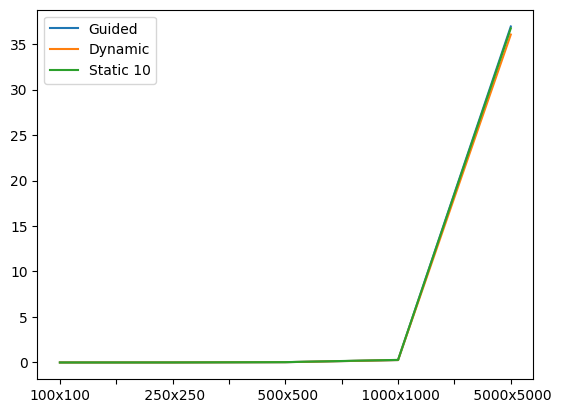

In [203]:
dfpsd = pd.read_csv('csv/producteParelelitzacioDynamic.csv')
dfpsg = pd.read_csv('csv/producteParelelitzacioGuided.csv')
dfps10 = pd.read_csv('csv/producteParelelitzacioStatic10.csv')
dfpsg.mean(numeric_only=True).plot(label='Guided')
dfpsd.mean(numeric_only=True).plot(label='Dynamic')
dfps10.mean(numeric_only=True).plot(label='Static 10')
plt.legend()
plt.plot()